## Model: Responsible Business Simulator (RBS)
In this notebook the core (calculation) steps of the RBS model are illustrated.

### `TheResponsibleBusinessSimulator` class
In order to work with the Responsible Business Simulator model, we will work with the ```TheResponsibleBusinessSimulator``` class. This class can be found in **core/tRBS.py**. This class takes three input values: (i) the name of the case, (ii) the format of the data (xlsx, json, csv) and (iii) the folder where data of the case can be found.

In [1]:
from pathlib import Path
from core.trbs import TheResponsibleBusinessSimulator

name = 'Beerwiser'
file_format = 'xlsx'
path = Path.cwd() / 'data' / 'beerwiser'

case = TheResponsibleBusinessSimulator(name, file_format, path)

Let's see how ```case``` looks currently:

In [2]:
print(case)

Case: Beerwiser (xlsx) 
Data location: /Users/tdijk004/Documents/tRBS/open source/trbs/model/data/beerwiser 
Input data: 
 First .build() a case to import data


Currently, it is rather empty. To get the input data, we will first need to ```build``` our case.

In [3]:
case.build()
print(case)

Creating 'Beerwiser'
Case: Beerwiser (xlsx) 
Data location: /Users/tdijk004/Documents/tRBS/open source/trbs/model/data/beerwiser 
Input data: 
 configurations
	['use_theme_weights']

configuration_value
	[0]

key_outputs
	['Accidents reduction' 'Water use reduction' 'Production cost reduction']

key_output_unit
	['#/year' 'hl/year' '%']

key_output_theme
	['People' 'Planet' 'Profit']

themes
	['People' 'Planet' 'Profit']

key_output_minimum
	[nan nan nan]

key_output_maximum
	[nan nan nan]

key_output_monetary
	[0 0 0]

key_output_smaller_the_better
	[0 0 0]

key_output_linear
	[1 1 0]

key_output_automatic
	[1 1 1]

key_output_start
	[nan nan nan]

key_output_end
	[nan nan nan]

key_output_threshold
	[nan nan nan]

decision_makers_options
	['Equal spread' 'Focus on training' 'Focus on water recycling']

internal_variable_inputs
	['Invest in training of employees' 'Invest in water recycling']

decision_makers_option_value
	[[150000 150000]
 [250000  50000]
 [ 50000 250000]]

scenarios


Now that we have a decent set-up of our case, we can `evaluate` it. For each Scenario and each Decision Makers Option the dependencies are calculated. 

In [4]:
case.evaluate()



Scenario: Base case | Decision Makers Option: Equal spread

0. 'Accidents reduction % (value: 0)' = 'Invest in training of employees' Squeezed * ''
	 add: 0.2052 = min(150000,150000) / 300000.0* 0.95 * 0.9 *0.48

1. 'Water use reduction % when effective (value: 0)' = 'Invest in water recycling' Squeezed * ''
	 add: 0.2727272727272727 = min(150000,150000) / 275000.0* 1.0 * 1.0 *0.5

2. 'Cost of training per employee (value: 0)' = 'Invest in training of employees' / '# employees'
	add: '300.0' = '150000' / '500.0'

3. 'New # accidents (value: 0)' = 'Current # accidents' * ''
	add: '51.0' = '51.0' * '1'

4. 'New water use (value: 0)' = 'Current water use' * ''
	add: '15000000.0' = '15000000.0' * '1'

5. 'Water use reduction % (value: 0)' = 'Water use reduction % when effective' * 'Effectiveness water recycling'
	add: '0.2672727272727273' = '0.2727272727272727' * '0.98'

6. 'Accidents reduction (value: 0)' = 'Current # accidents' * 'Accidents reduction %'
	add: '10.4652' = '51.0' * '0.20

The `evaluate` function creates an output dictionary (`output_dict`) for our `case`. This dictionary contains the results of our case and is structured as a nested dictionary with the following structure: 

{'Scenario A': <br>
   { <br>
    'Decision Maker Option I': <br>
        {<br>
        'key_outputs': {'Key Output X': value, ..}<br>
        }<br>
    'Decision Maker Option II': {..}<br>
    }<br>
'Scenario B': {..}<br>
}

In [5]:
case.output_dict['Base case']

{'Equal spread': {'key_outputs': {'Accidents reduction': 10.4652,
   'Water use reduction': 4009090.909090909,
   'Production cost reduction': 0.047657672727272726}},
 'Focus on training': {'key_outputs': {'Accidents reduction': 17.442,
   'Water use reduction': 1336363.6363636365,
   'Production cost reduction': 0.043793090909090907}},
 'Focus on water recycling': {'key_outputs': {'Accidents reduction': 3.4883999999999995,
   'Water use reduction': 6681818.181818182,
   'Production cost reduction': 0.051522254545454546}}}

Now that we have evaluated the dependencies, we can start to compare the key outputs. In order to do this we `appreciate` our case.

In [6]:
case.appreciate()


 Base case | Equal spread
['Accidents reduction' 'Water use reduction' 'Production cost reduction']: [49.99999999999999, 49.75609756097561, 81.12099305063569] * [0.3333333333333333, 0.16666666666666666, 0.5] = [16.66666667  8.29268293 40.56049653]

 Base case | Focus on training
['Accidents reduction' 'Water use reduction' 'Production cost reduction']: [100.0, 1.9512195121951232, 56.72564870657221] * [0.3333333333333333, 0.16666666666666666, 0.5] = [33.33333333  0.32520325 28.36282435]

 Base case | Focus on water recycling
['Accidents reduction' 'Water use reduction' 'Production cost reduction']: [-0.0, 97.5609756097561, 96.06313712465332] * [0.3333333333333333, 0.16666666666666666, 0.5] = [-0.         16.2601626  48.03156856]

 Optimistic | Equal spread
['Accidents reduction' 'Water use reduction' 'Production cost reduction']: [49.99999999999999, 51.21951219512194, 58.35152774736214] * [0.3333333333333333, 0.16666666666666666, 0.5] = [16.66666667  8.53658537 29.17576387]

 Optimisti

The `appreciate` functions extends our excisting output dictionary with information about the appreciation & weighted appreciation. The extened structure looks as follows:

{'Scenario A': <br>
   { <br>
    'Decision Maker Option I': <br>
        {<br>
        'key_outputs': {'Key Output X': value, ..}<br>
        **'appreciations': {'Key Output X': value, ..}<br>
        'weighted_appreciations': {'Key Output X': value, ..}**<br>
        }<br>
    'Decision Maker Option II': {..}<br>
    }<br>
'Scenario B': {..}<br>
}

In [7]:
case.output_dict['Base case']

{'Equal spread': {'key_outputs': {'Accidents reduction': 10.4652,
   'Water use reduction': 4009090.909090909,
   'Production cost reduction': 0.047657672727272726},
  'appreciations': {'Accidents reduction': 49.99999999999999,
   'Water use reduction': 49.75609756097561,
   'Production cost reduction': 81.12099305063569},
  'weighted_appreciations': {'Accidents reduction': 16.666666666666664,
   'Water use reduction': 8.292682926829269,
   'Production cost reduction': 40.560496525317845}},
 'Focus on training': {'key_outputs': {'Accidents reduction': 17.442,
   'Water use reduction': 1336363.6363636365,
   'Production cost reduction': 0.043793090909090907},
  'appreciations': {'Accidents reduction': 100.0,
   'Water use reduction': 1.9512195121951232,
   'Production cost reduction': 56.72564870657221},
  'weighted_appreciations': {'Accidents reduction': 33.33333333333333,
   'Water use reduction': 0.32520325203252054,
   'Production cost reduction': 28.362824353286104}},
 'Focus on wa

In [8]:
case.visualize('key_output_table', 'Base case')

,Accidents reduction,Water use reduction,Production cost reduction
Equal spread,10.47,4.0M,0.05
Focus on training,17.44,1.3M,0.04
Focus on water recycling,3.49,6.7M,0.05


Comparing key outputs for each decision makers option can become difficult: the ranges of the three key outputs varies wildly. For better comparisons, we can therefore look at the weighted appreciations:

In [9]:
case.visualize('appreciation_table', 'Base case')

,Accidents reduction,Water use reduction,Production cost reduction
Equal spread,16.67,8.29,40.56
Focus on training,33.33,0.33,28.36
Focus on water recycling,-0.00,16.26,48.03


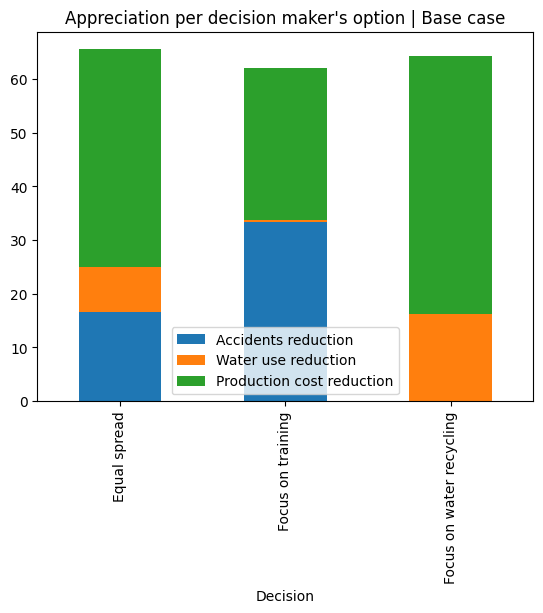

In [10]:
case.visualize('appreciation_per_dmo', 'Base case')